# Remapping degenerated network

When modelling wild type and degenerated networks, we want to be able to both remove and add synapses due to changes in dendritic and axonal morphologies. The synapses that are on unchanged branches should remain the same, removed branches will have their synapses removed, while added branches will get new synapses.

Preparation. 
Create a wild type network using Snudda.
Recreate the same network but with the modified morphologies (e.g. Parkinson's disease degenerated SPN dendrites, and growing FS axons).

Run this notebook on the two created networks.

In [1]:
original_network = "/home/hjorth/HBP/DELME/networks/pd0_5k_swap"
updated_network = "/home/hjorth/HBP/DELME/networks/pd2_5k_swap"
output_network =  "/home/hjorth/HBP/DELME/networks/pd2_output_network"

import os

original_network_file = os.path.join(original_network, "network-synapses.hdf5")
updated_network_file = os.path.join(updated_network, "network-synapses.hdf5")
output_network_file =  os.path.join(output_network, "network-synapses.hdf5")

original_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0"
updated_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2"

# original_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20211105/PD0"
# updated_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20211105/PD2"

In [2]:
from snudda.utils.swap_to_degenerated_morphologies_extended import SwapToDegeneratedMorphologiesExtended
swap = SwapToDegeneratedMorphologiesExtended(original_network_file=original_network_file,
                                             updated_network_file=updated_network_file,
                                             output_network_file=output_network_file,
                                             original_snudda_data_dir=original_snudda_data_dir,
                                             updated_snudda_data_dir=updated_snudda_data_dir)

Loading 5000 neurons with 2453190 synapses and 319 gap junctions
Loading 5000 neurons with 998144 synapses and 317 gap junctions


In [3]:
import cProfile
prof_file = "whysoslow.profile"
cProfile.runctx("swap.write_new_network_file()", None, locals(), filename=prof_file)
# swap.write_new_network_file()

Writing new network to /home/hjorth/HBP/DELME/networks/pd2_output_network/network-synapses.hdf5
10000 / 2453190
20000 / 2453190
30000 / 2453190
40000 / 2453190
50000 / 2453190
60000 / 2453190
70000 / 2453190
80000 / 2453190
90000 / 2453190
100000 / 2453190
110000 / 2453190
120000 / 2453190
130000 / 2453190
140000 / 2453190
150000 / 2453190
160000 / 2453190
170000 / 2453190
180000 / 2453190
190000 / 2453190
200000 / 2453190
210000 / 2453190
220000 / 2453190
230000 / 2453190
240000 / 2453190
250000 / 2453190
260000 / 2453190
270000 / 2453190
280000 / 2453190
290000 / 2453190
300000 / 2453190
310000 / 2453190
320000 / 2453190
330000 / 2453190
340000 / 2453190
350000 / 2453190
360000 / 2453190
370000 / 2453190
380000 / 2453190
390000 / 2453190
400000 / 2453190
410000 / 2453190
420000 / 2453190
430000 / 2453190
440000 / 2453190
450000 / 2453190
460000 / 2453190
470000 / 2453190
480000 / 2453190
490000 / 2453190
500000 / 2453190
510000 / 2453190
520000 / 2453190
530000 / 2453190
540000 / 245

In [4]:
import pstats
from pstats import SortKey
p = pstats.Stats(prof_file)
p.strip_dirs().sort_stats(SortKey.CUMULATIVE).print_stats(100)

Tue Sep  6 16:56:57 2022    whysoslow.profile

         218575815 function calls (214822552 primitive calls) in 3533.453 seconds

   Ordered by: cumulative time
   List reduced from 294 to 100 due to restriction <100>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000 3533.453 3533.453 {built-in method builtins.exec}
        1    0.000    0.000 3533.453 3533.453 <string>:1(<module>)
        1    0.800    0.800 3533.453 3533.453 swap_to_degenerated_morphologies.py:66(write_new_network_file)
        1    1.564    1.564 3528.105 3528.105 swap_to_degenerated_morphologies_extended.py:206(filter_synapses)
  2588219   11.110    0.000 3340.826    0.001 dataset.py:722(__getitem__)
        1    1.214    1.214 3301.095 3301.095 swap_to_degenerated_morphologies_extended.py:67(get_additional_synapses)
  1788234 3285.247    0.002 3285.536    0.002 {method 'read' of 'h5py._selector.Reader' objects}
   755199    8.116    0.000  215.681    0.000 swap_to

Loading 5000 neurons with 2453190 synapses and 319 gap junctions


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Loading 5000 neurons with 1343624 synapses and 295 gap junctions
Figure written: /home/hjorth/HBP/DELME/networks/pd2_output_network/figures/input-to-1-dSPN_4-and-internal-synapses.png


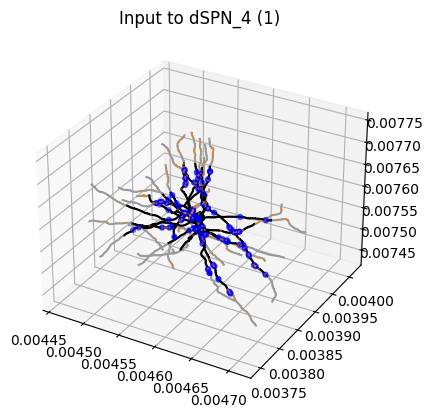

In [5]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=original_network,
                      degenerated_network_path=output_network)
plot_neuron_id = 1
pd.plot_neuron(neuron_id=plot_neuron_id)